In [1]:
import pandas as pd

# load the training dataset
!wget https: // raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)


--2023-03-09 09:24:57--  ftp://https/
           => '.listing'
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-03-09 09:24:57--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: 'seeds.csv'

seeds.csv           100%[===================>]   9.17K  --.-KB/s    in 0.004s  

2023-03-09 09:24:57 (2.27 MB/s) - 'seeds.csv' saved [9386/9386]

FINISHED --2023-03-09 09:24:57--
Total wall clock time: 0.4s
Downloaded: 1 files, 9.2K in 0.004s (2.27 MB/s)


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
57,14.92,14.43,0.9006,5.384,3.412,1.142
97,18.98,16.57,0.8687,6.449,3.552,2.144
83,19.57,16.74,0.8779,6.384,3.772,1.472
145,11.21,13.13,0.8167,5.279,2.687,6.169
60,11.42,12.86,0.8683,5.008,2.850,2.700
148,12.70,13.71,0.8491,5.386,2.911,3.260
190,10.93,12.80,0.8390,5.046,2.717,5.398
8,16.63,15.46,0.8747,6.053,3.465,2.040
164,11.14,12.79,0.8558,5.011,2.794,6.388
129,17.55,15.66,0.8991,5.791,3.690,5.366


In [5]:
# 6次元空間であると解釈できる。
# ただしこのままではプロットは難しい

# そこで主成分分析を行う

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# 標準化する
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
print(scaled_features)

# get 主成分
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

[[0.44098206 0.50206612 0.5707804  0.48648649 0.48610121 0.18930164]
 [0.40509915 0.44628099 0.66243194 0.36880631 0.50106914 0.03288302]
 [0.34938621 0.34710744 0.87931034 0.22072072 0.50392017 0.25145302]
 ...
 [0.24645892 0.25826446 0.7277677  0.18975225 0.42908054 0.98166664]
 [0.11803588 0.16528926 0.39927405 0.15540541 0.14682823 0.36834441]
 [0.16147309 0.19214876 0.54718693 0.19369369 0.24518888 0.63346292]]


array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

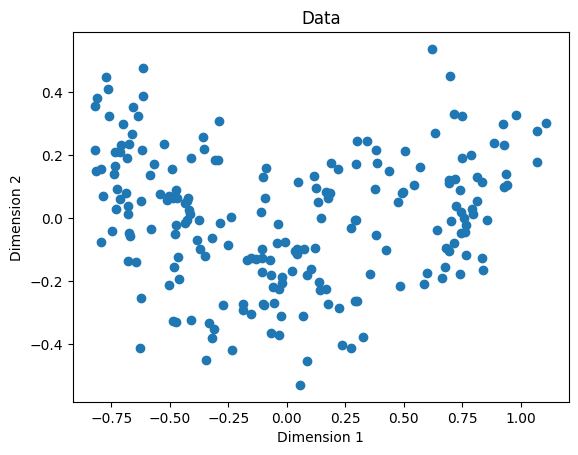

In [6]:
# 2次元になったのでプロットする

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()


/Users/rtr-x8/Documents/python3-ms-tutrial/pckag/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rtr-x8/Documents/python3-ms-tutrial/pckag/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rtr-x8/Documents/python3-ms-tutrial/pckag/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rtr-x8/Documents/python3-ms-tutrial/pckag/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

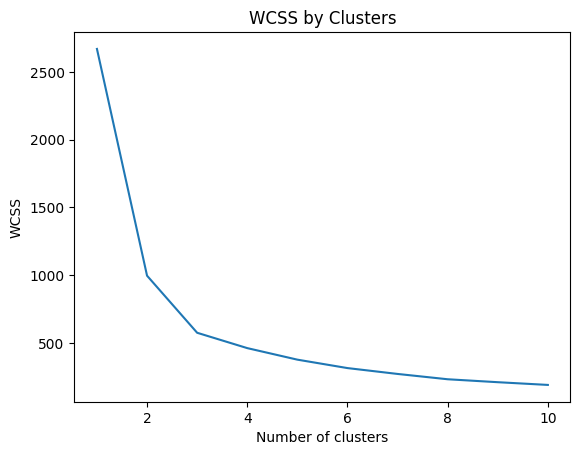

In [15]:
# クラスタ数はどのようにして決めれば良いのだろうか？
# WCSS(クラスター内平方和)と呼ばれる指標がある。
# クラスタ内にどれだけのサンプル数が平均して格納されるのか、という指標

import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

# 1 ~ 10でWCSSしてみる
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features.values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# 1 -> 2, 2 -> 3で顕著に減少することがわかる
# 3以降の減少幅は少ない。

# これは2、3くらいが適切なクラスタ数であることを示す

## クラスタリングの手法を試す

利用データはポーランドの化学アカデミー農業業物理学研究所のもの

In [16]:
# 読み込みと標準化、PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# load the training dataset
!wget https: // raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)


# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]


--2023-03-09 09:39:29--  ftp://https/
           => '.listing'
Resolving https (https)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2023-03-09 09:39:29--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: 'seeds.csv.1'

seeds.csv.1         100%[===================>]   9.17K  --.-KB/s    in 0s      

2023-03-09 09:39:29 (44.3 MB/s) - 'seeds.csv.1' saved [9386/9386]

FINISHED --2023-03-09 09:39:29--
Total wall clock time: 0.3s
Downloaded: 1 files, 9.2K in 0s (44.3 MB/s)


array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

In [17]:
# 3個でクラスタしてみる
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

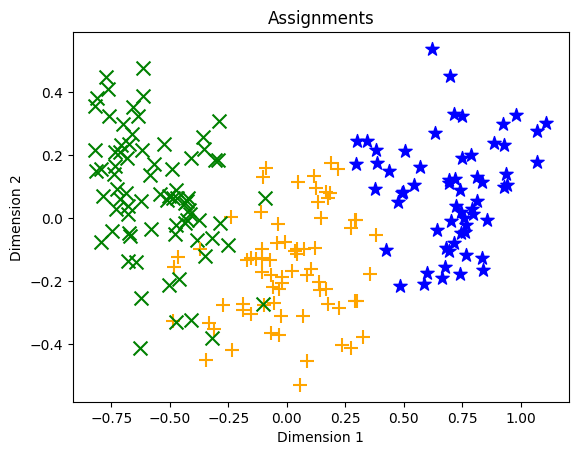

In [19]:
# plotする

import matplotlib.pyplot as plt
%matplotlib inline


def plot_clusters(samples, clusters):
    col_dic = {0: 'blue', 1: 'green', 2: 'orange'}
    mrk_dic = {0: '*', 1: 'x', 2: '+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1],
                    color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()


plot_clusters(features_2d, km_clusters)


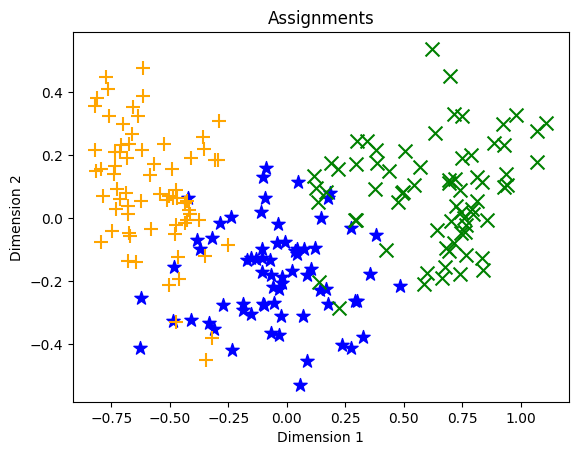

In [20]:
# 実際のデータ（つまりラベリング）と比較してみる
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)


## 階層的クラスタリング

K-meanと比較てして分布の過程が少ない。

階層的では分割ほう、行週法によってクラスタが作成される。

### 分割法

データセット全体から段階的にパーティションを見つける、トップダウンのアプローチ

### 凝集法

botomu
apu


各データ点間の結合距離が計算されます。  
ポイントは、最も近い隣接ポイントとペアごとにクラスター化されます。  
クラスタ間のリンケージ距離が計算されます。  
クラスターはペアごとに結合されて、より大きなクラスターになります。  
ステップ 3 と 4 は、すべてのデータ ポイントが 1 つのクラスターになるまで繰り返されます。  
リンケージ関数は、さまざまな方法で計算できます。  

ワードリンケージは、リンクされているクラスターの分散の増加を測定します。  
平均リンケージは、2 つのクラスターのメンバー間の平均ペアワイズ距離を使用します。  
完全リンクまたは最大リンクでは、2 つのクラスターのメンバー間の最大距離が使用されます。  
リンケージ関数の計算には、いくつかの異なる距離メトリックが使用されます。  

ユークリッドまたは l2 距離が最も広く使用されています。このメトリックは、ウォード リンケージ メソッドの唯一の選択肢です。  
Manhattan または l1 距離は外れ値に対してロバストであり、その他の興味深い特性があります。  
コサイン類似度は、位置ベクトル間の内積をベクトルの大きさで割ったものです。このメトリックは類似性の尺度であるのに対し、他の 2 つのメトリックは差異の尺度であることに注意してください。類似性は、画像やテキスト ドキュメントなどのデータを扱う場合に非常に役立ちます。
